## Load libraries

In [114]:
%matplotlib inline
#%pylab inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io import gbq
import numpy as np
import numpy.ma as ma
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import warnings

import os
import re
import json
import math
import operator
from time import time
from datetime import datetime
import random
import cPickle

from pandas.tools.plotting import scatter_matrix

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import scale, normalize
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold, StratifiedKFold 
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

from sklearn.linear_model import LogisticRegression

from matplotlib.colors import ListedColormap

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)


## Load Dataset

In [4]:
# contract data

data = pd.read_csv("merged.csv")


# data exploration
data.head()

,market,party_id,Count.of.Assets.Up.for.renewal.5.2017,Recently.bought.contract_3.Mon,Recently.Cancelled.Contract_3.Mon,Recently.bought.contract_6.Mon,Recently.Cancelled.Contract_6.Mon,Recently.bought.contract_9.Mon,Recently.Cancelled.Contract_9.Mon,Recently.bought.contract_12.Mon,...,demographic_owner_occupied,demographic_units_occupied,demographic_white,demographic_race_Black,demographic_race_American.Indian.and.Alaska.Native,demographic_race_Asian,demographic_mortgage,demographic_owner_mortgage,demographic_housing_year,demographic_travel_time
0,820,8155213,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,25604821,4,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,4696205,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001,25604821,4,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1030,25604821,4,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dtypes

market                                                                            object
party_id                                                                           int64
Count.of.Assets.Up.for.renewal.5.2017                                              int64
Recently.bought.contract_3.Mon                                                     int64
Recently.Cancelled.Contract_3.Mon                                                  int64
Recently.bought.contract_6.Mon                                                     int64
Recently.Cancelled.Contract_6.Mon                                                  int64
Recently.bought.contract_9.Mon                                                     int64
Recently.Cancelled.Contract_9.Mon                                                  int64
Recently.bought.contract_12.Mon                                                    int64
Recently.Cancelled.Contract_12.Mon                                                 int64
clc.3                

In [6]:
data.columns.values

array(['market', 'party_id', 'Count.of.Assets.Up.for.renewal.5.2017',
       'Recently.bought.contract_3.Mon',
       'Recently.Cancelled.Contract_3.Mon',
       'Recently.bought.contract_6.Mon',
       'Recently.Cancelled.Contract_6.Mon',
       'Recently.bought.contract_9.Mon',
       'Recently.Cancelled.Contract_9.Mon',
       'Recently.bought.contract_12.Mon',
       'Recently.Cancelled.Contract_12.Mon', 'clc.3', 'clc6', 'clc9',
       'clc12', 'X', 'Total.count.of.CFB.assets.by.Party.ID_5.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_6.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_7.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_8.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_9.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_10.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_11.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_12.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_1.17.2017',
       'Total.count.of.C

In [7]:
data.dtypes

market                                                                            object
party_id                                                                           int64
Count.of.Assets.Up.for.renewal.5.2017                                              int64
Recently.bought.contract_3.Mon                                                     int64
Recently.Cancelled.Contract_3.Mon                                                  int64
Recently.bought.contract_6.Mon                                                     int64
Recently.Cancelled.Contract_6.Mon                                                  int64
Recently.bought.contract_9.Mon                                                     int64
Recently.Cancelled.Contract_9.Mon                                                  int64
Recently.bought.contract_12.Mon                                                    int64
Recently.Cancelled.Contract_12.Mon                                                 int64
clc.3                

In [8]:
#rename variable names
data.rename(columns={ 
    'Count.of.Assets.Up.for.renewal.5.2017': 'count_of_assets_up_for_renewal_5_2017',
       'Recently.bought.contract_3.Mon': 'recently_bought_contract_3_mon',
       'Recently.Cancelled.Contract_3.Mon': 'recently_cancelled_contract_3_mon',
       'Recently.bought.contract_6.Mon': 'recently_bought_contract_6_Mon',
       'Recently.Cancelled.Contract_6.Mon': 'recently_cancelled_contract_6_mon',
       'Recently.bought.contract_9.Mon': 'recently_bought_contract_9_mon',
       'Recently.Cancelled.Contract_9.Mon': 'recently_cancelled_contract_9_mon',
       'Recently.bought.contract_12.Mon': 'recently_bought_contract_12_Mon',
       'Recently.Cancelled.Contract_12.Mon': 'recently_cancelled_contract_12_mon', 
       'clc.3':'clc3', 
       'Total.count.of.CFB.assets.by.Party.ID_5.16.2017': 'total_count_of_CFB_assets_by_party_id_5_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_6.16.2017': 'total_count_of_CFB_assets_by_party_id_6_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_7.16.2017': 'total_count_of_CFB_assets_by_party_id_7_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_8.16.2017': 'total_count_of_CFB_assets_by_party_id_8_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_9.16.2017': 'total_count_of_CFB_assets_by_party_id_9_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_10.16.2017': 'total_count_of_CFB_assets_by_party_id_10_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_11.16.2017': 'total_count_of_CFB_assets_by_party_id_11_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_12.16.2017': 'total_count_of_CFB_assets_by_party_id_12_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_1.17.2017': 'total_count_of_CFB_assets_by_party_id_1_17_2017',
       'Total.count.of.CFB.assets.by.Party.ID_2.17.2017': 'total_count_of_CFB_assets_by_party_id_2_17_2017',
       'Total.count.of.CFB.assets.by.Party.ID_3.17.2017': 'total_count_of_CFB_assets_by_party_id_3_17_2017',
       'Total.count.of.CFB.assets.by.Party.ID_4.17.2017': 'total_count_of_CFB_assets_by_party_id_4_17_2017',
       'Total.count.of.CFB.assets.by.Party.ID_5.17.2017': 'total_count_of_CFB_assets_by_party_id_5_17_2017',
    'Annual_Contract_Value': 'annual_contract_value', 
    'ORIGINAL_TOTAL_NET': 'original_total_net', 
    'Account.Sub.Type': 'account_sub_type',
    'Asset.Display.ID': 'asset_display_ID', 
    'Renewal.Flag': 'renewal_flag', 
    'Monthname': 'month_name', 
    'Period': 'period', 
    'MARKET': 'market',
    'ID': 'id', 
    'New_STATUS': 'new_status', 
    'OLD_Start_Date': 'old_start_date',
    'OLD_END_DATE': 'old_end_date', 
    'END_DATE': 'end_date', 
    'OLD_CONTRACT_TERM': 'old_contract_term',
    'NEW_CONTRACT_TERM': 'new_contract_term', 
    'old_fast_Flex': 'old_fast_flex', 
    'OLD_STATUS': 'old_status',
    'assest_wid_new': 'asset_wid_new', 
    'LAST_ACTIVITY_DATE': 'last_activity_date',
    'Product_Name': 'product_name', 
    'Account_ID': 'account_id', 
    'Acount_Name': 'account_name', 
    'Account_Type': 'account_type', 
    'CLC': 'clc',
    'CLC_Same_Zip': 'clc_same_zip', 
    'Old_Line_Type': 'old_line_type', 
    'New_Line_Type': 'new_line_type', 
    'Market_tier': 'market_tier',
    'FOLLOW_UP_STATUS': 'follow_up_status', 
    'Total_Credit_Amount': 'total_credit_amount', 
    'TOTAL_CONTRACT_VALUE': 'total_contract_value',
    'USER_ROLE_DESC': 'user_role_desc', 
    '.Renewal_Price ': 'renewal_price',
    '.Expiring_Contract_Total_Net ': 'expiring_contract_total_net', 
    'Promised_leads': 'promised_leads',
    'expected.leads.per.month': 'expected_leads_per_month', 
    'Flex_total_slots': 'flex_total_slots',
    '.Flex_total_slot_value ': 'flex_total_slot_value', 
    'Fast_total_slots': 'fast_total_slots',
    '.Fast_total_slot_value ': 'fast_total_slot_value', 
    '.overall_avg_lead_listing_price.': 'overall_avg_lead_listing_price',
    'Total.leads.in.3.Month': 'total_leads_in_3_month', 
    'expected.lead.3.Mon.': 'expected_leads_in_3_month',
    'Full.fillment...3Mon.': 'fulfillment_perc_in_3_month', 
    'total.leads.in.6.months': 'total_leads_in_6_month', 
    'expected.lead.6.Mon': 'expected_leads_in_6_month',
    'fulfllment...6Mon.': 'fulfillment_perc_in_6_month', 
    'total.leads.in.9.months': 'total_leads_in_9_month', 
    'expected.leads.9Mon': 'expected_leads_in_9_month',
    'fulfillment...9.Mon.': 'fulfillment_perc_in_9_month', 
    'total.leads.in.12.months': 'total_leads_in_12_month',
    'expected.lead.12.Mon': 'expected_leads_in_12_month', 
    'lead fullfilment % 12Mon': 'fulfillment_perc_in_12_month',
    '.month_1_leads_avg_price ': 'month_1_leads_avg_price',
    '.month_2_leads_avg_price ': 'month_2_leads_avg_price', 
    '.month_3_leads_avg_price ': 'month_3_leads_avg_price',
    '.month_4_leads_avg_price ': 'month_4_leads_avg_price', 
    '.month_5_leads_avg_price ': 'month_5_leads_avg_price',
    '.month_6_leads_avg_price ': 'month_6_leads_avg_price', 
    '.month_7_leads_avg_price ': 'month_7_leads_avg_price',
    '.month_8_leads_avg_price ': 'month_8_leads_avg_price', 
    '.month_9_leads_avg_price ': 'month_9_leads_avg_price',
    '.month_10_leads_avg_price ': 'month_10_leads_avg_price', 
    '.month_11_leads_avg_price ': 'month_11_leads_avg_price',
    '.month_12_leads_avg_price ': 'month_12_leads_avg_price', 
    '.month_13_leads_avg_price ': 'month_13_leads_avg_price',
    'total_HLC': 'total_hlc', 
    'cust_Interactions': 'cust_interactions', 
    'cust_cb_Interactions': 'cust_cb_interactions', 
    'Asset_Interactions': 'asset_interactions', 
    'Median.Price.of.leads': 'median_price_of_leads', 
    'leads.in.last.3.months.of.contract': 'leads_in_last_3_months',
    'lead...in.last.3.months': 'lead_perc_in_last_3_months', 
    'Asset.Start.date': 'asset_start_date', 
    'Asset.End.date': 'asset_end_date',
    'contract.start.Month': 'contract_start_month', 
    'contrct.start.year': 'contract_start_year',
    'Season.contract.starts': 'season_contract_starts', 
    'season.contract.start': 'season_contract_starts_dum',
    'contract.start.day': 'contract_start_date', 
    'season.contract.ends': 'season_contract_ends', 
    'contract.end.day': 'contract_end_date',
    'expiring.day': 'expiring_day', 
    'week.contract.expires': 'week_contract_expires', 
    'month.contract.expires': 'month_contract_expires',
    'Waitlist.at.end.of.contract': 'waitlist_at_end_of_contract', 
    'New.Price.Tier': 'new_price_tier',
    'Rate.card.price..New.Tier.': 'rate_card_price_new_tier',
    'Manual.Price.Override.flag...0.none..1..price.override.': 'manual_price_override_flag_0_none_1_price_override',
    'ManualDiscount_amt': 'manual_discount_amt', 
    'Manual_discount': 'manual_discount', 
    'Promo_disc': 'promo_disc', 
    'ToTaL_DISC': 'total_disc',
    'State': 'state',
    'X20.Tier': "X20_tier",
    'lead.fullfilment...12Mon': 'lead_fulfillment_12_mon',
    'Month.1_Recommended': 'month_1_recommended',
    'Month.1_Sold': 'month_1_sold',
    'Month.1_Sell.thru.': 'month_1_sell_thru',
    'Month.2_Recommended': 'month_2_recommended', 
    'Month.2_Sold': 'month_2_sold',
    'Month.2_sell.thru..': 'month_2_sell_thru', 
    'Month.3_Recommended': 'month_3_recommended', 
    'Month.3_Sold': 'month_3_sold',
    'Month.3_sell.thru..': 'month_3_sell_thru', 
    'Market.Segmentation_3.Mon': 'market_segmentation_3_mon',
    'Month.4_Recommended': 'month_4_recommended', 
    'Month.4_Sold': 'month_4_sold', 
    'Month.4_Sell.Thru..': 'month_4_sell_thru',
    'Month.5_Recommended': 'month_5_recommended', 
    'Month.5_Sold': 'month_5_sold', 
    'Month.5_sell.thru..': 'month_5_sell_thru',                         
    'Month.6_Recommended': 'month_6_recommended', 
    'Month.6_Sold': 'month_6_sold', 
    'Month.6_sell.thru.': 'month_6_sell_thru',
    'Market.Segmentation_6Mon': 'market_segmentation_6_mon', 
    'Month.7_Recommended': 'month_7_recommended', 
    'Month.7_Sold': 'month_7_sold',
    'Month.7_sell.thru.': 'month_7_sell_thru', 
    'Month.8_Recommended': 'month_8_recommended', 
    'Month.8_Sold': 'month_8_sold',
    'Month.8_sell.thru.': 'month_8_sell_thru', 
    'Month.9_Recommended': 'month_9_recommended', 
    'Month.9_Sold': 'month_9_sold',
    'Month.9_sell.thru.': 'month_9_sell_thru', 
    'Market.Segmentation_9.Mon': 'market_segmentation_9_mon',
    'Month.10_Recommended': 'month_10_recommended', 
    'Month.10_Sold': 'month_10_sold', 
    'Month.10_sell.thru.': 'month_10_sell_thru',
    'Month.11_Recommended': 'month_11_recommended', 
    'Month.11_Sold': 'month_11_sold', 
    'Month.11_sell.thru.': 'month_11_sell_thru',
    'Month.12_Recommended': 'month_12_recommended', 
    'Month.12_Sold': 'month_12_sold', 
    'sell.thru.': 'month_12_sell_thru',
    'Market.Segmentation_12.Mon': 'market_segmentation_12_mon', 
    'CLC_3.mo': 'clc_3_mon', 
    'HLC_3.mo': 'hlc_3_mon',
    'Ave.DOM_3.mo': 'ave_dom_3_mon', 
    'CLC_6.mo': 'clc_6_mon', 
    'HLC_6.mo': 'hlc_6_mon', 
    'Ave.DOM_6.mo': 'ave_dom_6_mon', 
    'CLC_9.mo': 'clc_9_mon',
    'HLC_9.mo': 'hlc_9_mon', 
    'Ave.DOM_9.mo': 'ave_dom_9_mon', 
    'CLC_12.mo': 'clc_12_mon', 
    'HLC_12.mo': 'hlc_12_mon',
    'Ave.DOM_12.mo': 'ave_dom_12_mon', 
    'Current.Median.Price': 'current_median_price', 
    'waitlist.3.Mon': 'waitlist_3_mon',
    'Waitlist.6.mon': 'waitlist_6_mon', 
    'waitlist.9.mon': 'waitlist_9_mon',
    'waitlist.12.Mon': 'waitlist_12_mon', 
    'demographic_occupation_service.occupations': 'demographic_occupation_service_occupations',
    'demographic_occupation_Sales.and.office.occupations': 'demographic_occupation_Sales_and_office_occupations',
    'demographic_race_American.Indian.and.Alaska.Native':'demographic_race_American_Indian_And_Native'
                             }, 
                     inplace=True)


In [9]:
data.columns.values

array(['market', 'party_id', 'count_of_assets_up_for_renewal_5_2017',
       'recently_bought_contract_3_mon',
       'recently_cancelled_contract_3_mon',
       'recently_bought_contract_6_Mon',
       'recently_cancelled_contract_6_mon',
       'recently_bought_contract_9_mon',
       'recently_cancelled_contract_9_mon',
       'recently_bought_contract_12_Mon',
       'recently_cancelled_contract_12_mon', 'clc3', 'clc6', 'clc9',
       'clc12', 'X', 'total_count_of_CFB_assets_by_party_id_5_16_2017',
       'total_count_of_CFB_assets_by_party_id_6_16_2017',
       'total_count_of_CFB_assets_by_party_id_7_16_2017',
       'total_count_of_CFB_assets_by_party_id_8_16_2017',
       'total_count_of_CFB_assets_by_party_id_9_16_2017',
       'total_count_of_CFB_assets_by_party_id_10_16_2017',
       'total_count_of_CFB_assets_by_party_id_11_16_2017',
       'total_count_of_CFB_assets_by_party_id_12_16_2017',
       'total_count_of_CFB_assets_by_party_id_1_17_2017',
       'total_count_of_CF

## Feature dataframe

In [10]:
features = ['market', 'party_id', 'count_of_assets_up_for_renewal_5_2017',
       'recently_bought_contract_3_mon',
       'recently_cancelled_contract_3_mon',
       'recently_bought_contract_6_Mon',
       'recently_cancelled_contract_6_mon',
       'recently_bought_contract_9_mon',
       'recently_cancelled_contract_9_mon',
       'recently_bought_contract_12_Mon',
       'recently_cancelled_contract_12_mon', 'clc3', 'clc6', 'clc9',
       'clc12', 'X', 'total_count_of_CFB_assets_by_party_id_5_16_2017',
       'total_count_of_CFB_assets_by_party_id_6_16_2017',
       'total_count_of_CFB_assets_by_party_id_7_16_2017',
       'total_count_of_CFB_assets_by_party_id_8_16_2017',
       'total_count_of_CFB_assets_by_party_id_9_16_2017',
       'total_count_of_CFB_assets_by_party_id_10_16_2017',
       'total_count_of_CFB_assets_by_party_id_11_16_2017',
       'total_count_of_CFB_assets_by_party_id_12_16_2017',
       'total_count_of_CFB_assets_by_party_id_1_17_2017',
       'total_count_of_CFB_assets_by_party_id_2_17_2017',
       'total_count_of_CFB_assets_by_party_id_3_17_2017',
       'total_count_of_CFB_assets_by_party_id_4_17_2017',
       'total_count_of_CFB_assets_by_party_id_5_17_2017',
       'annual_contract_value', 'original_total_net', 'account_sub_type',
       'asset_display_ID', 'renewal_flag', 'month_name', 'period', 'id',
       'lead_fulfillment', 'new_status', 'old_start_date', 'old_end_date',
       'end_date', 'old_contract_term', 'new_contract_term',
       'expiring_quantity', 'old_full_half', 'old_fast_flex',
       'new_full_half', 'new_fast_flex', 'old_status', 'asset_wid_new',
       'asset_wid_old', 'last_activity_date', 'product_name', 'account_id',
       'account_name', 'account_type', 'clc', 'clc_same_zip',
       'old_line_type', 'new_line_type', 'market_tier', 'follow_up_status',
       'total_credit_amount', 'total_contract_value', 'user_role_desc',
       'auto_renewal', 'Renewal_Price', 'Expiring_Contract_Total_Net',
       'promised_leads', 'expected_leads_per_month', 'flex_total_slots',
       'Flex_total_slot_value', 'fast_total_slots',
       'Fast_total_slot_value', 'total_slots_owned', 'active_contracts',
       'recently_bought_contracts', 'recently_cancelled_contracts',
       'con_total_leads', 'overall_avg_lead_listing_price',
       'month_1_leads', 'month_2_leads', 'month_3_leads',
       'total_leads_in_3_month', 'expected_leads_in_3_month',
       'fulfillment_perc_in_3_month', 'month_4_leads', 'month_5_leads',
       'month_6_leads', 'total_leads_in_6_month',
       'expected_leads_in_6_month', 'fulfillment_perc_in_6_month',
       'month_7_leads', 'month_8_leads', 'month_9_leads',
       'total_leads_in_9_month', 'expected_leads_in_9_month',
       'fulfillment_perc_in_9_month', 'month_10_leads', 'month_11_leads',
       'month_12_leads', 'total_leads_in_12_month',
       'expected_leads_in_12_month', 'lead_fulfillment_12_mon',
       'month_13_leads', 'month_1_leads_avg_price',
       'month_2_leads_avg_price', 'month_3_leads_avg_price',
       'month_4_leads_avg_price', 'month_5_leads_avg_price',
       'month_6_leads_avg_price', 'month_7_leads_avg_price',
       'month_8_leads_avg_price', 'month_9_leads_avg_price',
       'month_10_leads_avg_price', 'month_11_leads_avg_price',
       'month_12_leads_avg_price', 'month_13_leads_avg_price',
       'primary_mls_id', 'total_hlc', 'state', 'market_type',
       'cust_interactions', 'cust_comments', 'cust_hours_toclose',
       'cust_cb_interactions', 'cust_cb_comments', 'cust_cb_hours_toclose',
       'asset_interactions', 'asset_comments', 'asset_hours_toclose',
       'median_price_of_leads', 'leads_in_last_3_months',
       'lead_perc_in_last_3_months', 'asset_start_date', 'asset_end_date',
       'contract_start_month', 'contract_start_year',
       'season_contract_starts', 'season_contract_starts_dum',
       'contract_start_date', 'season_contract_ends', 'contract_end_date',
       'expiring_day', 'week_contract_expires', 'month_contract_expires',
       'waitlist_at_end_of_contract', 'promotion', 'new_price_tier',
       'rate_card_price_new_tier',
       'manual_price_override_flag_0_none_1_price_override',
       'manual_discount_amt', 'manual_discount', 'promo_disc',
       'total_disc', 'state', 'X20_tier', 'month_1_recommended',
       'month_1_sold', 'month_1_sell_thru', 'month_2_recommended',
       'month_2_sold', 'month_2_sell_thru', 'month_3_recommended',
       'month_3_sold', 'month_3_sell_thru', 'market_segmentation_3_mon',
       'month_4_recommended', 'month_4_sold', 'month_4_sell_thru',
       'month_5_recommended', 'month_5_sold', 'month_5_sell_thru',
       'month_6_recommended', 'month_6_sold', 'month_6_sell_thru',
       'market_segmentation_6_mon', 'month_7_recommended', 'month_7_sold',
       'month_7_sell_thru', 'month_8_recommended', 'month_8_sold',
       'month_8_sell_thru', 'month_9_recommended', 'month_9_sold',
       'month_9_sell_thru', 'market_segmentation_9_mon',
       'month_10_recommended', 'month_10_sold', 'month_10_sell_thru',
       'month_11_recommended', 'month_11_sold', 'month_11_sell_thru',
       'month_12_recommended', 'month_12_sold', 'month_12_sell_thru',
       'market_segmentation_12_mon', 'clc_3_mon', 'hlc_3_mon',
       'ave_dom_3_mon', 'clc_6_mon', 'hlc_6_mon', 'ave_dom_6_mon',
       'clc_9_mon', 'hlc_9_mon', 'ave_dom_9_mon', 'clc_12_mon',
       'hlc_12_mon', 'ave_dom_12_mon', 'current_median_price',
       'waitlist_3_mon', 'waitlist_6_mon', 'waitlist_9_mon',
       'waitlist_12_mon', 'demographic_med_earnings_workers',
       'demographic_education',
       'demographic_occupation_service_occupations',
       'demographic_occupation_Sales_and_office_occupations',
       'demographic_occupation_Natural_resources_construction_maintenance_occupations',
       'demographic_occupationProduction_transportation_material_moving_occupations',
       #'demographic_children', 
       'demographic_income', 'demograhic_health',
       'demographic_senior', 'demographic_disability', 'demographic_male',
       'demographic_population_in_labor_force',
       'demographic_owner_occupied', 'demographic_units_occupied',
       'demographic_white', 'demographic_race_Black',
       'demographic_race_American_Indian_And_Native',
       'demographic_race_Asian', 
       #'demographic_mortgage',
       'demographic_owner_mortgage', 'demographic_housing_year',
       #'demographic_travel_time'
    
]

In [11]:
len(features)

235

In [12]:
features_drop = [
    'month_name',
    'primary_mls_id',
    'market',
    'id',
    'old_start_date',
    'old_end_date',
    'end_date'
    'renewal_flag', 
    'asset_display_ID',
    'month_13_leads', 
    'month_13_leads_avg_price',
    'current_median_price',
    'state',
    'X', 
    #'total_count_of_CFB_assets_by_party_id_5_16_2017',
    'total_count_of_CFB_assets_by_party_id_6_16_2017',
    'total_count_of_CFB_assets_by_party_id_7_16_2017',
    'total_count_of_CFB_assets_by_party_id_8_16_2017',
    'total_count_of_CFB_assets_by_party_id_9_16_2017',
    'total_count_of_CFB_assets_by_party_id_10_16_2017',
    'total_count_of_CFB_assets_by_party_id_11_16_2017',
    'total_count_of_CFB_assets_by_party_id_12_16_2017',
    'total_count_of_CFB_assets_by_party_id_1_17_2017',
    'total_count_of_CFB_assets_by_party_id_2_17_2017',
    'total_count_of_CFB_assets_by_party_id_3_17_2017',
    'total_count_of_CFB_assets_by_party_id_4_17_2017',
    'total_count_of_CFB_assets_by_party_id_5_17_2017',
    'clc3', 
    'clc6', 
    'clc9',
    'clc12', 
    'season_contract_starts'
]
features = [i for i in features if i not in features_drop]
len(features)

205

In [13]:
data_features = data[features].copy()

In [14]:
y = data['renewal_flag'].copy()

## Dummify categorical variables 

In [15]:
#data_features['month_name'].unique()

In [16]:
data_features['period'].unique()

array([201705])

In [17]:
data_features['new_status'].unique()

array(['Not Renewed', 'Renewed'], dtype=object)

In [18]:
data_features['old_contract_term'].unique()

array([12,  6])

In [19]:
data_features['new_contract_term'].unique()

array([12,  6])

In [20]:
data_features['old_full_half'].unique()

array(['Full', 'Half'], dtype=object)

In [21]:
data_features['old_fast_flex'].unique()

array(['Flex', 'Fast'], dtype=object)

In [22]:
data_features['new_full_half'].unique()

array(['Full', 'Half'], dtype=object)

In [23]:
data_features['new_fast_flex'].unique()

array(['Flex', 'Fast'], dtype=object)

In [24]:
data_features['product_name'].unique()

array(['Connection(SM) for Co-Brokerage'], dtype=object)

In [25]:
data_features['account_type'].unique()

array(['Realtor Agent', 'Broker'], dtype=object)

In [26]:
data_features['new_line_type'].unique()

array(['Cancel', 'Renew', 'Credit', 'Amend'], dtype=object)

In [27]:
data_features['old_line_type'].unique()

array(['Renew', 'Add', 'AssetSync', 'Amend', 'Credit', '0'], dtype=object)

In [28]:
data_features['follow_up_status'].unique()

array(['Will Not Renew', '0', 'Renewed', 'Manual Renewal',
       'LM 2nd Attempt', 'LM 3rd Attempt', 'LM 4th Attempt',
       'LM 1st Attempt', 'LM 5th Attempt', 'Contacted: Still Deciding',
       'Contacted: Not Renewing', 'Contacted: Set Appointment',
       'Pending Renewal', 'Contacted: Probable Renewal'], dtype=object)

In [29]:
data_features['user_role_desc'].unique()

array(['Agent Territory Team Scottsdale',
       'Agent Inside Sales Manager - Westlake',
       'Agent Territory Team - Westlake', 'Agent Hybrid Inbound Team',
       'Broker Inside Sales Manager - Westlake',
       'Broker Hybrid Inbound Team', '0',
       'Inside Sales Manager - Scottsdale',
       'New Business Top Producer Team',
       'Inside Sales Director - Scottsdale',
       'Agent Leads Team - Scottsdale', 'Senior Outbound Channel Team',
       'Agent Leads Team', 'Broker Consultants',
       'High Performing Top Producer Team', 'Agent Leads Team Manager',
       'Inside Sales Director - Westlake',
       'New Business Broker Consultants',
       'Broker Sales Representative - East',
       'Inside Sales Top Producer Team',
       'Broker Sales Representative - West', 'Events Sales Team'], dtype=object)

In [30]:
data_features['auto_renewal'].unique()

array([1, 0])

In [31]:
data_features['contract_start_month'].unique()

array([ 5, 11,  1,  4,  9,  3, 10, 12,  2])

In [32]:
data_features['contract_start_year'].unique()

array([2016, 2015, 2017])

In [33]:
data_features['season_contract_starts_dum'].unique()

array([1, 3, 4])

In [34]:
data_features['season_contract_ends'].unique()

array(['Spring'], dtype=object)

In [35]:
data_features['month_contract_expires'].unique()

array([5])

In [36]:
data_features['promotion'].unique()

array([nan, 'CBC10OFF51PLUS', 'CBC50OFF', 'CBC75PLUS', 'CBC30PLUS',
       'CBC10OFFREMAX', 'CBC100PLUS', 'CBC10BHHS', 'CBC60OFF', 'CBC70OFF',
       '50CBCSS', 'CBC10PLUS', 'CBC33OFF', 'CBC150PLUS', 'CBC175PLUS',
       'CBC10OFFBHHS', 'NAR10offCBC', 'CBC40LWBNCH', 'CBC35ZULIA',
       'CBC25PLUS', 'CBC50PLUS', 'CBC15PLUS', 'CBC50STALE', 'CBC125PLUS',
       'CBCBOGOSTALE'], dtype=object)

In [37]:
data_features['manual_price_override_flag_0_none_1_price_override'].unique()

array([0, 1])

In [38]:
data_features['market_segmentation_3_mon'].unique()

array(['Partially Sold', 'Oversold', '100% Sold', 'Unsold', 'No Inventory'], dtype=object)

In [39]:
data_features['market_segmentation_6_mon'].unique()

array(['Partially Sold', 'Oversold', 'Unsold', '100% Sold', 'No Inventory'], dtype=object)

In [40]:
data_features['market_segmentation_9_mon'].unique()

array(['Partially Sold', 'Oversold', '100% Sold', 'Unsold', 'No Inventory'], dtype=object)

In [41]:
data_features['market_segmentation_12_mon'].unique()

array(['Partially Sold', 'Oversold', '100% Sold', 'Unsold', 'No Inventory'], dtype=object)

In [42]:
dum_names = [
    #'month_name',
    'period',
    'old_status',
    'new_status',
    'old_contract_term',
    'expiring_quantity',
    'old_full_half',
    'old_fast_flex',
    'new_fast_flex',
    'new_full_half',
    'product_name',
    'account_type',
    'account_sub_type',
    'new_line_type',
    'old_line_type',
    'follow_up_status',
    'user_role_desc',
    'auto_renewal',
    'contract_start_month',
    'contract_start_year',
    'season_contract_starts_dum',
    'season_contract_ends',
    'expiring_day',
    'week_contract_expires',
    'month_contract_expires',
    'promotion',
    'manual_price_override_flag_0_none_1_price_override',
    'market_segmentation_3_mon',
    'market_segmentation_6_mon',
    'market_segmentation_9_mon',
    'market_segmentation_12_mon',
    'market_type'
]

In [43]:
data_features = pd.get_dummies(data_features, prefix=dum_names, columns = dum_names)


In [44]:
data_features.head()

,party_id,count_of_assets_up_for_renewal_5_2017,recently_bought_contract_3_mon,recently_cancelled_contract_3_mon,recently_bought_contract_6_Mon,recently_cancelled_contract_6_mon,recently_bought_contract_9_mon,recently_cancelled_contract_9_mon,recently_bought_contract_12_Mon,recently_cancelled_contract_12_mon,...,market_segmentation_9_mon_Partially Sold,market_segmentation_9_mon_Unsold,market_segmentation_12_mon_100% Sold,market_segmentation_12_mon_No Inventory,market_segmentation_12_mon_Oversold,market_segmentation_12_mon_Partially Sold,market_segmentation_12_mon_Unsold,market_type_0,market_type_City,market_type_Zip
0,8155213,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,25604821,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,4696205,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,25604821,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,25604821,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [45]:
list(data_features.columns.values)

['party_id',
 'count_of_assets_up_for_renewal_5_2017',
 'recently_bought_contract_3_mon',
 'recently_cancelled_contract_3_mon',
 'recently_bought_contract_6_Mon',
 'recently_cancelled_contract_6_mon',
 'recently_bought_contract_9_mon',
 'recently_cancelled_contract_9_mon',
 'recently_bought_contract_12_Mon',
 'recently_cancelled_contract_12_mon',
 'total_count_of_CFB_assets_by_party_id_5_16_2017',
 'annual_contract_value',
 'original_total_net',
 'renewal_flag',
 'lead_fulfillment',
 'end_date',
 'new_contract_term',
 'asset_wid_new',
 'asset_wid_old',
 'last_activity_date',
 'account_id',
 'account_name',
 'clc',
 'clc_same_zip',
 'market_tier',
 'total_credit_amount',
 'total_contract_value',
 'Renewal_Price',
 'Expiring_Contract_Total_Net',
 'promised_leads',
 'expected_leads_per_month',
 'flex_total_slots',
 'Flex_total_slot_value',
 'fast_total_slots',
 'Fast_total_slot_value',
 'total_slots_owned',
 'active_contracts',
 'recently_bought_contracts',
 'recently_cancelled_contracts'

In [46]:
# encoding categorical data
#encoder = LabelEncoder()
#data_features[:,dum_names] = encoder.fit_transform(data_features[:,dum_names])
#onehotencoder = OneHotEncoder(categorical_features = [0])
#data_features = onehotencoder.fit_transform(data_features).toarray()

## Variable correlations

In [47]:
corr_matrix = data_features.corr()

In [48]:
corr_list = []
additional_features_to_drop = []

print "Strongly correlated features:"
print "====="

for i, row in corr_matrix.iterrows():
    for j in row.index:
        if abs(row[j]) > 0.8 and i < j:
            corr_list.append((i, j, row[j]))


corr_list_sorted = sorted(corr_list, key = lambda tup: abs(tup[2]), reverse = True)

for tup in corr_list_sorted:
    i, j, corr_i_j = tup[0], tup[1], tup[2]
    print i, j, corr_i_j
    i_nan = sum(np.isnan(data_features[i]))
    j_nan = sum(np.isnan(data_features[j]))
    print i_nan, j_nan
    i_and_j_not_in = (i not in additional_features_to_drop) and (j not in additional_features_to_drop)
    if i_nan >= j_nan and i_and_j_not_in:
        additional_features_to_drop.append(i)
        print "dropping", i 
    elif i_and_j_not_in:
        additional_features_to_drop.append(j)                
        print "dropping", j                
    print "====="

Strongly correlated features:
=====
expected_leads_in_9_month expected_leads_per_month 1.0
0 0
dropping expected_leads_in_9_month
=====
expected_leads_in_3_month promised_leads 1.0
0 0
dropping expected_leads_in_3_month
=====
expected_leads_in_3_month expected_leads_in_6_month 1.0
0 0
=====
expected_leads_in_6_month promised_leads 1.0
0 0
dropping expected_leads_in_6_month
=====
expected_leads_in_12_month promised_leads 1.0
0 0
dropping expected_leads_in_12_month
=====
expected_leads_in_12_month expected_leads_in_3_month 1.0
0 0
=====
expected_leads_in_12_month expected_leads_in_6_month 1.0
0 0
=====
asset_start_date contract_start_date 1.0
0 0
dropping asset_start_date
=====
asset_end_date contract_end_date 1.0
0 0
dropping asset_end_date
=====
waitlist_3_mon waitlist_6_mon 1.0
0 0
dropping waitlist_3_mon
=====
waitlist_3_mon waitlist_9_mon 1.0
0 0
=====
waitlist_6_mon waitlist_9_mon 1.0
0 0
dropping waitlist_6_mon
=====
new_status_Not Renewed new_status_Renewed -1.0
0 0
dropping new_

=====
month_3_recommended month_8_recommended 0.962416158602
0 0
=====
month_10_recommended month_11_recommended 0.962361248363
0 0
=====
asset_start_date old_contract_term_6 0.962316626193
0 0
=====
asset_start_date old_contract_term_12 -0.962316626193
0 0
=====
contract_start_date old_contract_term_6 0.962316626193
0 0
=====
contract_start_date old_contract_term_12 -0.962316626193
0 0
=====
month_10_sold month_12_sold 0.96216944712
0 0
=====
month_2_recommended month_7_recommended 0.962132493119
0 0
=====
month_3_recommended month_7_recommended 0.962013126861
0 0
=====
con_total_leads total_leads_in_6_month 0.961836948709
0 0
=====
month_10_recommended month_12_recommended 0.961125462258
0 0
=====
month_3_recommended month_6_recommended 0.960128913508
0 0
=====
fulfillment_perc_in_3_month fulfillment_perc_in_6_month 0.958803464519
0 0
dropping fulfillment_perc_in_3_month
=====
month_2_recommended month_6_recommended 0.958523109858
0 0
=====
month_6_sold month_8_sold 0.95831761784
0 0

month_2_sold month_7_sold 0.901763440205
0 0
=====
month_12_sold month_8_recommended 0.901605916596
0 0
=====
month_8_leads total_leads_in_12_month 0.901395625732
0 0
=====
con_total_leads month_8_leads 0.901218607456
0 0
=====
month_3_sold month_9_recommended 0.901164841645
0 0
=====
con_total_leads month_5_leads 0.901025490757
0 0
=====
month_1_sold month_4_recommended 0.900752895173
0 0
=====
recently_bought_contract_12_Mon recently_bought_contracts 0.90071870945
0 0
=====
month_2_sold month_8_sold 0.900644496274
0 0
=====
month_2_sold month_9_recommended 0.900544091569
0 0
=====
month_5_sold month_8_recommended 0.900425355251
0 0
=====
month_5_sold month_7_recommended 0.900221799322
0 0
=====
month_5_sold month_6_recommended 0.900095559289
0 0
=====
month_2_leads total_leads_in_9_month 0.899969470397
0 0
=====
month_1_sold month_9_recommended 0.899962026164
0 0
=====
month_9_leads total_leads_in_9_month 0.899902917812
0 0
dropping month_9_leads
=====
month_12_sold month_7_recommend

leads_in_last_3_months month_8_leads 0.850962159403
0 0
=====
month_5_recommended month_6_sold 0.850276683478
0 0
=====
month_1_recommended month_8_sold 0.849782714659
0 0
=====
month_6_recommended month_6_sold 0.847244507005
0 0
=====
month_7_leads month_9_leads 0.846914675841
0 0
=====
month_5_leads total_leads_in_3_month 0.846133480759
0 0
=====
month_6_sold month_8_recommended 0.845546966083
0 0
=====
month_6_sold month_7_recommended 0.844952518494
0 0
=====
month_3_leads month_5_leads 0.844624328207
0 0
=====
month_5_leads month_6_leads 0.844486927589
0 0
=====
month_12_leads total_leads_in_9_month 0.844437504731
0 0
dropping month_12_leads
=====
month_11_sold month_1_recommended 0.844293139647
0 0
=====
leads_in_last_3_months total_leads_in_6_month 0.842316319604
0 0
=====
month_12_recommended month_8_sold 0.842004394682
0 0
=====
month_7_sell_thru month_8_sell_thru 0.840592321197
0 0
=====
month_11_recommended month_8_sold 0.840262427389
0 0
=====
month_6_sold month_9_recommende

In [49]:
additional_features_to_drop

['expected_leads_in_9_month',
 'expected_leads_in_3_month',
 'expected_leads_in_6_month',
 'expected_leads_in_12_month',
 'asset_start_date',
 'asset_end_date',
 'waitlist_3_mon',
 'waitlist_6_mon',
 'new_status_Not Renewed',
 'old_contract_term_12',
 'old_full_half_Full',
 'old_fast_flex_Fast',
 'new_fast_flex_Fast',
 'new_full_half_Full',
 'new_full_half_Half',
 'account_type_Broker',
 'account_sub_type_Customer',
 'new_line_type_Cancel',
 'auto_renewal_0',
 'manual_price_override_flag_0_none_1_price_override_0',
 'expected_leads_per_month',
 'waitlist_12_mon',
 'fast_total_slots',
 'recently_bought_contract_3_mon',
 'active_contracts',
 'recently_cancelled_contract_3_mon',
 'lead_fulfillment',
 'con_total_leads',
 'month_7_recommended',
 'cust_comments',
 'hlc_12_mon',
 'hlc_6_mon',
 'month_10_recommended',
 'recently_bought_contract_6_Mon',
 'month_5_recommended',
 'recently_cancelled_contract_6_mon',
 'season_contract_starts_dum_1',
 'recently_bought_contract_9_mon',
 'month_8_rec

In [50]:
data_features.drop([col for col in additional_features_to_drop], axis=1, inplace=True)

In [51]:
data_features.shape

(6232, 253)

## NaNs

In [52]:
#data_features.fillna(data_features.mean(), inplace=True)


In [53]:
data_features.replace('',0,regex=True, inplace = True)

In [54]:
data_features.replace([np.inf, -np.inf], np.nan)

,party_id,total_count_of_CFB_assets_by_party_id_5_16_2017,annual_contract_value,original_total_net,renewal_flag,asset_wid_new,asset_wid_old,last_activity_date,account_id,account_name,...,market_segmentation_9_mon_Partially Sold,market_segmentation_9_mon_Unsold,market_segmentation_12_mon_100% Sold,market_segmentation_12_mon_No Inventory,market_segmentation_12_mon_Oversold,market_segmentation_12_mon_Partially Sold,market_segmentation_12_mon_Unsold,market_type_0,market_type_City,market_type_Zip
0,8155213,1,6266.88,6266.88,0,4414751,3203499,40664,001j000000bfl6QAAQ,Kim Lucas,...,1,0,0,0,0,1,0,0,0,1
1,25604821,4,4300.80,4300.8,0,4453376,3239162,40865,001j000000bZAXJAA4,Claire Kenna,...,1,0,0,0,0,1,0,0,0,1
2,4696205,4,2556.00,1278,1,4448644,3228450,40680,001j000000bYlSaAAK,Steven Rovithis,...,1,0,0,0,0,1,0,0,0,1
3,25604821,4,4300.80,4300.8,0,4452701,3194297,40865,001j000000bZAXJAA4,Claire Kenna,...,1,0,0,0,0,1,0,0,0,1
4,25604821,4,4300.80,4300.8,0,4478827,3293435,40865,001j000000bZAXJAA4,Claire Kenna,...,0,0,0,0,1,0,0,0,0,1
5,25604821,4,4300.80,4300.8,0,4478828,3293436,40865,001j000000bZAXJAA4,Claire Kenna,...,0,0,0,0,1,0,0,0,0,1
6,1785859,2,8135.64,5057.81,1,4453424,3220589,40681,001j000000bXxJ3AAK,Paul Miele,...,0,0,0,0,0,1,0,0,0,1
7,27726337,1,6833.40,5867.38,1,4475546,3207024,1/0/00,001j000000baG96AAE,Greg Stutsman,...,0,0,1,0,0,0,0,0,0,1
8,4041412,4,5184.96,4547.44,1,4487922,3271632,40876,001j000000bg20eAAA,"GENE CALLAHAN, CRS",...,1,0,0,0,0,1,0,0,0,1
9,3612139,1,849.96,424.99,1,4396569,3252601,1/0/00,001j000000bhxGHAAY,Todd M. Crevier,...,0,0,0,0,0,1,0,0,0,1


In [55]:
"""
nan_series = data_features.isnull().sum()
nan_series.sort_values(ascending = False, inplace = True)
nan_series
"""

'\nnan_series = data_features.isnull().sum()\nnan_series.sort_values(ascending = False, inplace = True)\nnan_series\n'

In [56]:
data_features.fillna(data_features.mean(), inplace=True)


,party_id,total_count_of_CFB_assets_by_party_id_5_16_2017,annual_contract_value,original_total_net,renewal_flag,asset_wid_new,asset_wid_old,last_activity_date,account_id,account_name,...,market_segmentation_9_mon_Partially Sold,market_segmentation_9_mon_Unsold,market_segmentation_12_mon_100% Sold,market_segmentation_12_mon_No Inventory,market_segmentation_12_mon_Oversold,market_segmentation_12_mon_Partially Sold,market_segmentation_12_mon_Unsold,market_type_0,market_type_City,market_type_Zip
0,8155213,1,6266.88,6266.88,0,4414751,3203499,40664,001j000000bfl6QAAQ,Kim Lucas,...,1,0,0,0,0,1,0,0,0,1
1,25604821,4,4300.80,4300.8,0,4453376,3239162,40865,001j000000bZAXJAA4,Claire Kenna,...,1,0,0,0,0,1,0,0,0,1
2,4696205,4,2556.00,1278,1,4448644,3228450,40680,001j000000bYlSaAAK,Steven Rovithis,...,1,0,0,0,0,1,0,0,0,1
3,25604821,4,4300.80,4300.8,0,4452701,3194297,40865,001j000000bZAXJAA4,Claire Kenna,...,1,0,0,0,0,1,0,0,0,1
4,25604821,4,4300.80,4300.8,0,4478827,3293435,40865,001j000000bZAXJAA4,Claire Kenna,...,0,0,0,0,1,0,0,0,0,1
5,25604821,4,4300.80,4300.8,0,4478828,3293436,40865,001j000000bZAXJAA4,Claire Kenna,...,0,0,0,0,1,0,0,0,0,1
6,1785859,2,8135.64,5057.81,1,4453424,3220589,40681,001j000000bXxJ3AAK,Paul Miele,...,0,0,0,0,0,1,0,0,0,1
7,27726337,1,6833.40,5867.38,1,4475546,3207024,1/0/00,001j000000baG96AAE,Greg Stutsman,...,0,0,1,0,0,0,0,0,0,1
8,4041412,4,5184.96,4547.44,1,4487922,3271632,40876,001j000000bg20eAAA,"GENE CALLAHAN, CRS",...,1,0,0,0,0,1,0,0,0,1
9,3612139,1,849.96,424.99,1,4396569,3252601,1/0/00,001j000000bhxGHAAY,Todd M. Crevier,...,0,0,0,0,0,1,0,0,0,1


## Infs

In [57]:
#inf_series = np.isinf(data_features).sum()
#inf_series.sort_values(ascending = False, inplace = True)
#inf_series = inf_series[inf_series > 0]
#print inf_series

## Census dataframe

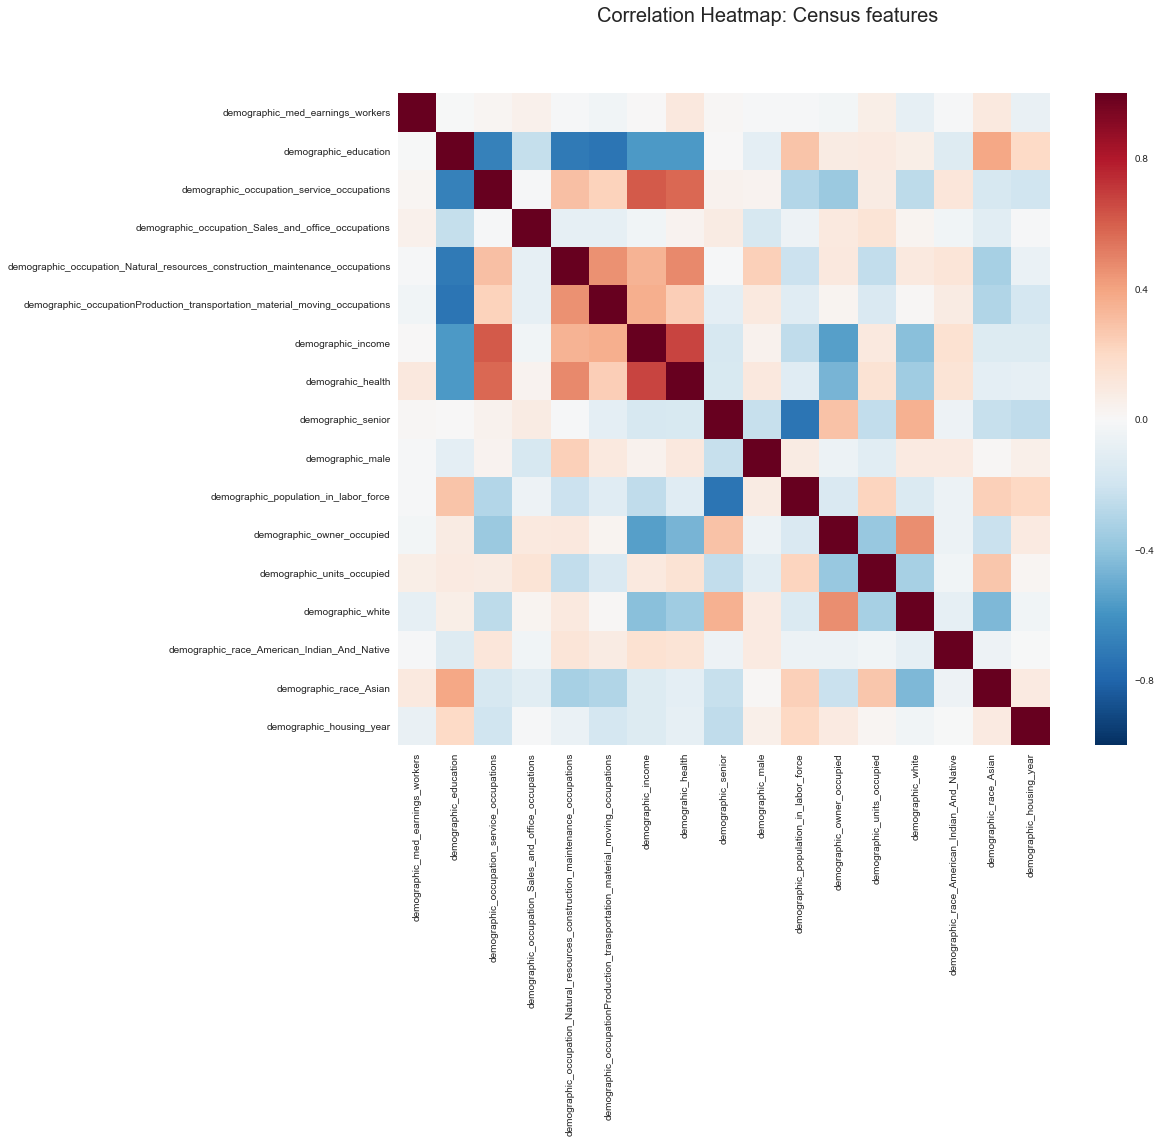

In [58]:
census_feature_names = [
    'demographic_med_earnings_workers', 'demographic_education',
       'demographic_occupation_service_occupations',
       'demographic_occupation_Sales_and_office_occupations',
       'demographic_occupation_Natural_resources_construction_maintenance_occupations',
       'demographic_occupationProduction_transportation_material_moving_occupations',
       #'demographic_children', 
    'demographic_income', 'demograhic_health',
       'demographic_senior', 'demographic_male',
       'demographic_population_in_labor_force',
       'demographic_owner_occupied', 'demographic_units_occupied',
       'demographic_white', 'demographic_race_American_Indian_And_Native',
       'demographic_race_Asian', 
    #'demographic_mortgage',
       'demographic_housing_year', 
    #'demographic_travel_time'
]
census_feature_names = [i for i in census_feature_names if i in data_features]
census_features = data_features[census_feature_names].copy()

#Correlation Heatmap
corrmat = census_features.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot=False, fmt='.1f')

f.suptitle('Correlation Heatmap: Census features', fontsize=20);

In [59]:
census_features.dtypes

demographic_med_earnings_workers                                                 float64
demographic_education                                                            float64
demographic_occupation_service_occupations                                       float64
demographic_occupation_Sales_and_office_occupations                              float64
demographic_occupation_Natural_resources_construction_maintenance_occupations    float64
demographic_occupationProduction_transportation_material_moving_occupations      float64
demographic_income                                                               float64
demograhic_health                                                                float64
demographic_senior                                                               float64
demographic_male                                                                 float64
demographic_population_in_labor_force                                            float64
demographic_owner_occ

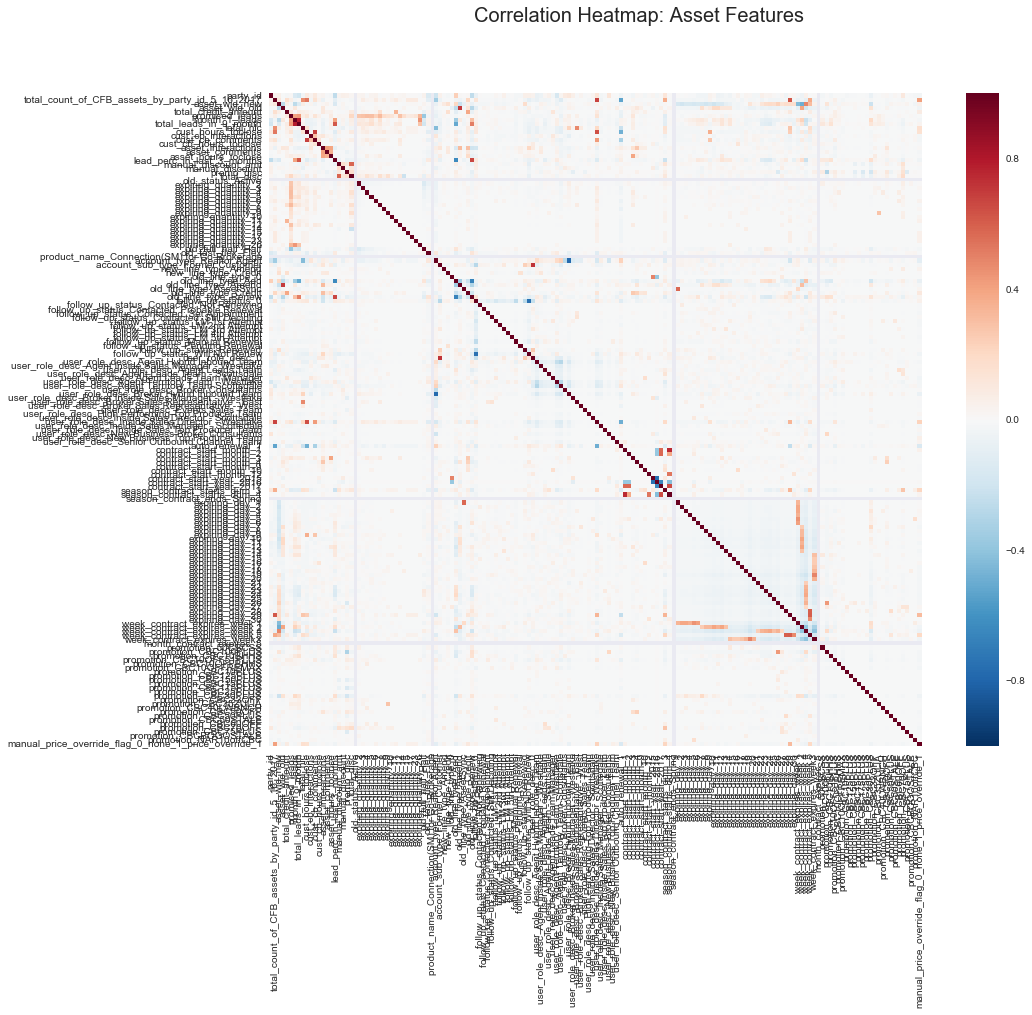

In [60]:
asset_feature_names = ['party_id',
                       'total_count_of_CFB_assets_by_party_id_5_16_2017',
                       'annual_contract_value', 
                       'original_total_net',
                       'lead_fulfillment', 
                       'asset_wid_new', 
                       'asset_wid_old', 
                       'last_activity_date',
                       #'account_id', 
                       #'account_name',   
                       'total_credit_amount', 
                       'total_contract_value', 
                       'Renewal_Price',
                       'Expiring_Contract_Total_Net', 
                       'promised_leads',
                       #'flex_total_slots',  
                       #'Flex_total_slot_value', 'Fast_total_slot_value'
                       #'total_slots_owned',  
       'overall_avg_lead_listing_price', 'month_1_leads',
       'fulfillment_perc_in_3_month', 'fulfillment_perc_in_6_month',
       'total_leads_in_9_month', 'fulfillment_perc_in_9_month',
       'lead_fulfillment_12_mon', 'month_1_leads_avg_price',
       'month_2_leads_avg_price', 'month_3_leads_avg_price',
       'month_4_leads_avg_price', 'month_5_leads_avg_price',
       'month_6_leads_avg_price', 'month_7_leads_avg_price',
       'month_8_leads_avg_price', 'month_9_leads_avg_price',
       'month_10_leads_avg_price', 'month_11_leads_avg_price',
       'month_12_leads_avg_price', 'primary_mls_id', 'total_hlc',
                       
                       
       #'market_type', 
                       'cust_hours_toclose', 'cust_cb_interactions',
       'cust_cb_comments', 'cust_cb_hours_toclose', 'asset_interactions',
       'asset_comments', 'asset_hours_toclose', 
                       
                       #'median_price_of_leads',
       'lead_perc_in_last_3_months', 
      #  'asset_start_date', 'asset_end_date',
      # 'contract_start_date', 'contract_end_date',
                       
       'manual_discount_amt',  'manual_discount',  'promo_disc',  'total_disc',  
       'old_status_Active',  
                       'expiring_quantity_2',  
                       'expiring_quantity_3',  
                       'expiring_quantity_4',  
                       'expiring_quantity_5',  
                       'expiring_quantity_6',  
                       'expiring_quantity_7',  
                       'expiring_quantity_8',  
                       'expiring_quantity_9',  
                       'expiring_quantity_10',  
                       'expiring_quantity_11',  
                       'expiring_quantity_12',  
                       'expiring_quantity_14',  
                       'expiring_quantity_15',  
                       'expiring_quantity_17',  
                       'expiring_quantity_23',  
                       'expiring_quantity_26',  
                       'old_full_half_Half',  
                       'old_fast_flex_Flex',  
                       'product_name_Connection(SM) for Co-Brokerage',  
                       'account_type_Realtor Agent',  
                       'account_sub_type_Former Customer',  
                       'new_line_type_Amend',  
                       'new_line_type_Credit',  
                       'old_line_type_0',  
                       'old_line_type_Add',  
                       'old_line_type_Amend',  
                       'old_line_type_AssetSync',  
                       'old_line_type_Credit',  
                       'old_line_type_Renew',  
                       'follow_up_status_0',  
                       'follow_up_status_Contacted: Not Renewing',
                       'follow_up_status_Contacted: Probable Renewal',
                       'follow_up_status_Contacted: Set Appointment',
                       'follow_up_status_Contacted: Still Deciding',
                       'follow_up_status_LM 1st Attempt',
                       'follow_up_status_LM 2nd Attempt',
                       'follow_up_status_LM 3rd Attempt',
                       'follow_up_status_LM 4th Attempt',
                       'follow_up_status_LM 5th Attempt',
                       'follow_up_status_Manual Renewal',
                       'follow_up_status_Pending Renewal', 
                       'follow_up_status_Renewed',
                       'follow_up_status_Will Not Renew', 
                       'user_role_desc_0',
                       'user_role_desc_Agent Hybrid Inbound Team',  
                       'user_role_desc_Agent Inside Sales Manager - Westlake',  
                       'user_role_desc_Agent Leads Team',  'user_role_desc_Agent Leads Team - Scottsdale',  
                       'user_role_desc_Agent Leads Team Manager',  'user_role_desc_Agent Territory Team - Westlake',  
                       'user_role_desc_Agent Territory Team Scottsdale',  'user_role_desc_Broker Consultants',  
                       'user_role_desc_Broker Hybrid Inbound Team',  'user_role_desc_Broker Inside Sales Manager - Westlake',  
                       'user_role_desc_Broker Sales Representative - East',  'user_role_desc_Broker Sales Representative - West',  
                       'user_role_desc_Events Sales Team',  'user_role_desc_High Performing Top Producer Team',  
                       'user_role_desc_Inside Sales Director - Scottsdale',  'user_role_desc_Inside Sales Director - Westlake',  
                       'user_role_desc_Inside Sales Manager - Scottsdale',  'user_role_desc_Inside Sales Top Producer Team',  
                       'user_role_desc_New Business Broker Consultants',  'user_role_desc_New Business Top Producer Team',  
                       'user_role_desc_Senior Outbound Channel Team', 
                       'auto_renewal_1',  
                       'contract_start_month_1',  
                       'contract_start_month_2',  
                       'contract_start_month_3',  
                       'contract_start_month_4',  
                       'contract_start_month_9',  
                       'contract_start_month_10',  
                       'contract_start_month_12',  
                       'contract_start_year_2015',  
                       'contract_start_year_2016',  
                       'contract_start_year_2017',  
                       'season_contract_starts_dum_3',  
                       'season_contract_starts_dum_4',  
                       'season_contract_ends_Spring',  
                       'expiring_day_1',  'expiring_day_2',  
                       'expiring_day_3',  'expiring_day_4',  
                       'expiring_day_5',  'expiring_day_6',  
                       'expiring_day_7',  'expiring_day_8',  
                       'expiring_day_9',  'expiring_day_10',  
                       'expiring_day_11',  'expiring_day_12',  
                       'expiring_day_13',  'expiring_day_14',  'expiring_day_15',  
                       'expiring_day_16',  'expiring_day_17',  'expiring_day_18',  
                       'expiring_day_19',  'expiring_day_20',  'expiring_day_21',  
                       'expiring_day_22',  'expiring_day_23',  'expiring_day_24',  
                       'expiring_day_25',  'expiring_day_26',  'expiring_day_27',  
                       'expiring_day_28',  'expiring_day_29',  'expiring_day_30',  
                       'week_contract_expires_week 1',  'week_contract_expires_week 2', 
                       'week_contract_expires_week 4',  'week_contract_expires_week 5',  
                       'week_contract_expires_week3',  'month_contract_expires_5',  'promotion_50CBCSS',  
                       'promotion_CBC100PLUS',  'promotion_CBC10BHHS',  'promotion_CBC10OFF51PLUS',  'promotion_CBC10OFFBHHS',  
                       'promotion_CBC10OFFREMAX',  'promotion_CBC10PLUS',  'promotion_CBC125PLUS',  'promotion_CBC150PLUS',  
                       'promotion_CBC15PLUS',  'promotion_CBC175PLUS',  'promotion_CBC25PLUS',  'promotion_CBC30PLUS',  
                       'promotion_CBC33OFF',  'promotion_CBC35ZULIA',  'promotion_CBC40LWBNCH',  'promotion_CBC50OFF',  
                       'promotion_CBC50PLUS',  'promotion_CBC50STALE',  'promotion_CBC60OFF',  'promotion_CBC70OFF',  
                       'promotion_CBC75PLUS',  
                       'promotion_CBCBOGOSTALE',  
                       'promotion_NAR10offCBC', 
                       'manual_price_override_flag_0_none_1_price_override_1'

]

asset_feature_names = [i for i in asset_feature_names if i in data_features]
asset_features = data_features[asset_feature_names].copy()

#Correlation Heatmap
corrmat = asset_features.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot=False, fmt='.1f')

f.suptitle('Correlation Heatmap: Asset Features', fontsize=20);

In [61]:
asset_features.dtypes

party_id                                                  int64
total_count_of_CFB_assets_by_party_id_5_16_2017           int64
annual_contract_value                                    object
original_total_net                                       object
asset_wid_new                                             int64
asset_wid_old                                             int64
last_activity_date                                       object
total_credit_amount                                     float64
total_contract_value                                     object
Renewal_Price                                            object
Expiring_Contract_Total_Net                              object
promised_leads                                            int64
overall_avg_lead_listing_price                           object
month_1_leads                                             int64
total_leads_in_9_month                                    int64
month_1_leads_avg_price                 

In [62]:

for j in asset_features:
    if asset_features[j].dtypes == 'object':
        print j



annual_contract_value
original_total_net
last_activity_date
total_contract_value
Renewal_Price
Expiring_Contract_Total_Net
overall_avg_lead_listing_price
month_1_leads_avg_price
month_2_leads_avg_price
month_3_leads_avg_price
month_4_leads_avg_price
month_5_leads_avg_price
month_6_leads_avg_price
month_7_leads_avg_price
month_8_leads_avg_price
month_9_leads_avg_price
month_10_leads_avg_price
month_11_leads_avg_price
month_12_leads_avg_price


In [81]:
data_features.total_contract_value= data_features['total_contract_value'].convert_objects(convert_numeric=True).fillna(0)
data_features.annual_contract_value= data_features['annual_contract_value'].convert_objects(convert_numeric=True).fillna(0)
data_features.original_total_net= data_features['original_total_net'].convert_objects(convert_numeric=True).fillna(0)
data_features.last_activity_date= data_features['last_activity_date'].convert_objects(convert_numeric=True).fillna(0)
data_features.Renewal_Price= data_features['Renewal_Price'].convert_objects(convert_numeric=True).fillna(0)
data_features.Expiring_Contract_Total_Net= data_features['Expiring_Contract_Total_Net'].convert_objects(convert_numeric=True).fillna(0)
data_features.overall_avg_lead_listing_price= data_features['overall_avg_lead_listing_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_1_leads_avg_price= data_features['month_1_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_2_leads_avg_price= data_features['month_2_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_3_leads_avg_price= data_features['month_3_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_4_leads_avg_price= data_features['month_4_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_5_leads_avg_price= data_features['month_5_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_6_leads_avg_price= data_features['month_6_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_7_leads_avg_price= data_features['month_7_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_8_leads_avg_price= data_features['month_8_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_9_leads_avg_price= data_features['month_9_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_10_leads_avg_price= data_features['month_10_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_11_leads_avg_price= data_features['month_11_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
data_features.month_12_leads_avg_price= data_features['month_12_leads_avg_price'].convert_objects(convert_numeric=True).fillna(0)
 

/Users/yyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/Users/yyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/yyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the 

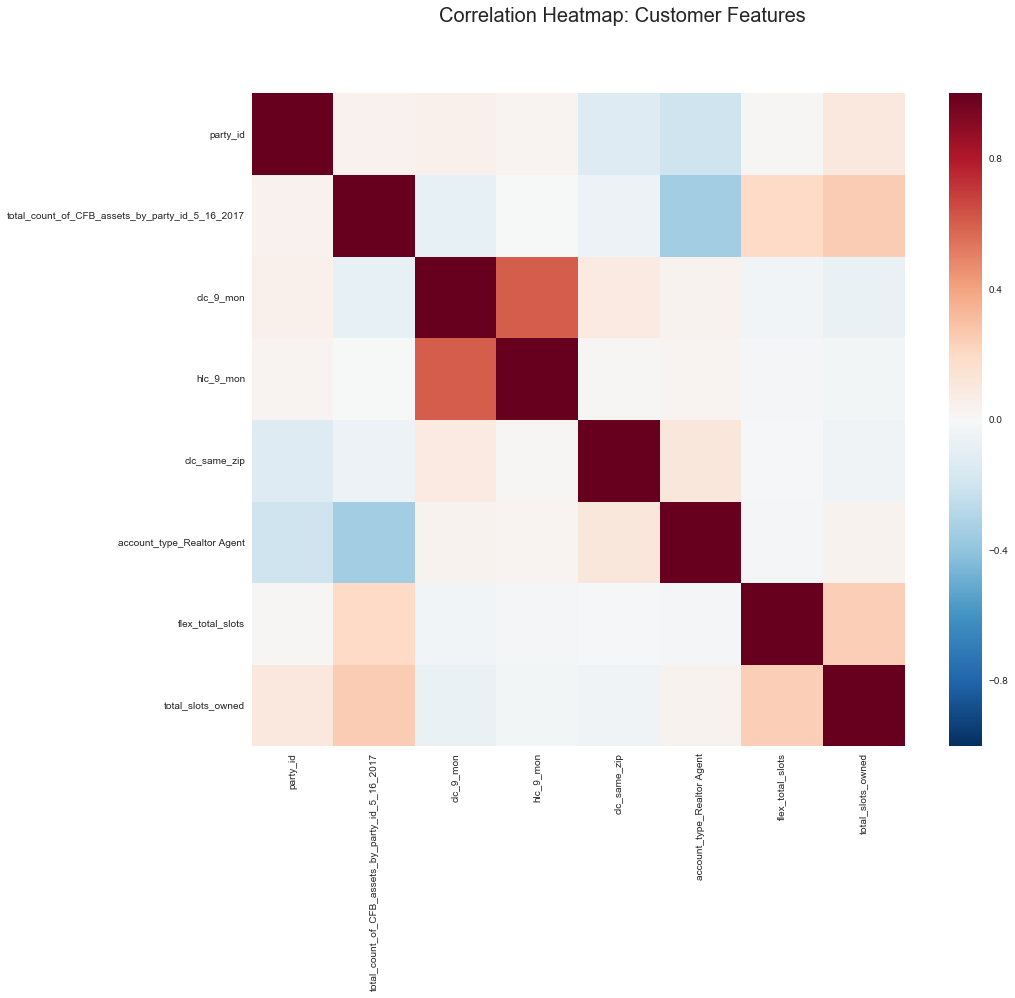

In [65]:
customer_feature_names = ['party_id', 
'total_count_of_CFB_assets_by_party_id_5_16_2017',
'recently_cancelled_contracts',
'clc_9_mon', 'hlc_9_mon',
'clc_same_zip',
#'account_id',
#'account_sub_type',
#'account_name',
'account_type_Realtor Agent',
                           
                         
 'flex_total_slots',
 'Flex_total_slot_value', 
 'Fast_total_slot_value',
 'total_slots_owned',

                          
]

customer_feature_names = [i for i in customer_feature_names if i in data_features]
customer_features = data_features[customer_feature_names].copy()

#Correlation Heatmap
corrmat = customer_features.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot=False, fmt='.1f')

f.suptitle('Correlation Heatmap: Customer Features', fontsize=20);

In [66]:
customer_features.dtypes

party_id                                             int64
total_count_of_CFB_assets_by_party_id_5_16_2017      int64
clc_9_mon                                            int64
hlc_9_mon                                            int64
clc_same_zip                                         int64
account_type_Realtor Agent                           uint8
flex_total_slots                                   float64
Flex_total_slot_value                               object
Fast_total_slot_value                               object
total_slots_owned                                  float64
dtype: object

In [82]:
data_features.Flex_total_slot_value= data_features['Flex_total_slot_value'].convert_objects(convert_numeric=True).fillna(0)
data_features.Fast_total_slot_value= data_features['Fast_total_slot_value'].convert_objects(convert_numeric=True).fillna(0)


/Users/yyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/Users/yyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


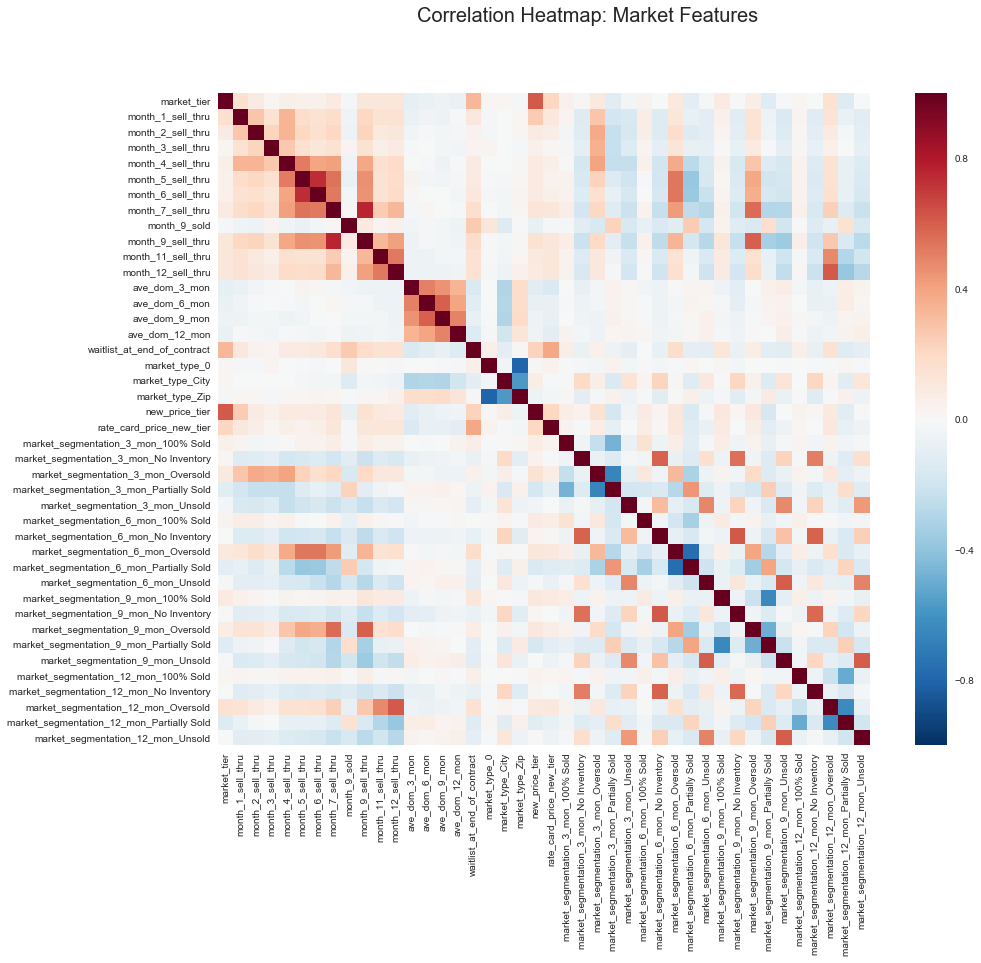

In [68]:
market_feature_names = ['market',
                        'market_tier', 
                        'month_1_sell_thru',
                        'month_2_sell_thru', 
                        'month_3_sell_thru', 
                        'month_4_sell_thru',
                        'month_5_sell_thru', 
                        'month_6_sell_thru', 
                        'month_7_sell_thru',
                        'month_8_sell_thru', 
                        'month_9_sold', 
                        'month_9_sell_thru',
                        'month_10_sell_thru', 
                        'month_11_sell_thru', 
                        'month_12_sell_thru',
                        'ave_dom_3_mon', 
                        'ave_dom_6_mon', 
                        'ave_dom_9_mon', 
                        'ave_dom_12_mon',
                        'median_price_of_leads',
                        'waitlist_at_end_of_contract',
                        'market_type_0',
                         'market_type_City',
                         'market_type_Zip', 
                        'new_price_tier',
                        'rate_card_price_new_tier',
                        'market_segmentation_3_mon_100% Sold',  'market_segmentation_3_mon_No Inventory',  
                        'market_segmentation_3_mon_Oversold',  'market_segmentation_3_mon_Partially Sold',  
                        'market_segmentation_3_mon_Unsold',  'market_segmentation_6_mon_100% Sold',  
                        'market_segmentation_6_mon_No Inventory',  'market_segmentation_6_mon_Oversold',  
                        'market_segmentation_6_mon_Partially Sold',  'market_segmentation_6_mon_Unsold',  
                        'market_segmentation_9_mon_100% Sold',  'market_segmentation_9_mon_No Inventory',  
                        'market_segmentation_9_mon_Oversold',  'market_segmentation_9_mon_Partially Sold',  
                        'market_segmentation_9_mon_Unsold',  'market_segmentation_12_mon_100% Sold',  
                        'market_segmentation_12_mon_No Inventory',  'market_segmentation_12_mon_Oversold',  
                        'market_segmentation_12_mon_Partially Sold',  
                        'market_segmentation_12_mon_Unsold',  
                        

                        
]
market_feature_names = [i for i in market_feature_names if i in data_features]
market_features = data_features[market_feature_names].copy()

#Correlation Heatmap
corrmat = market_features.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot=False, fmt='.1f')

f.suptitle('Correlation Heatmap: Market Features', fontsize=20);

In [69]:
market_features.dtypes

market_tier                                    int64
month_1_sell_thru                            float64
month_2_sell_thru                            float64
month_3_sell_thru                            float64
month_4_sell_thru                            float64
month_5_sell_thru                            float64
month_6_sell_thru                            float64
month_7_sell_thru                            float64
month_9_sold                                   int64
month_9_sell_thru                            float64
month_11_sell_thru                           float64
month_12_sell_thru                           float64
ave_dom_3_mon                                  int64
ave_dom_6_mon                                  int64
ave_dom_9_mon                                  int64
ave_dom_12_mon                                 int64
median_price_of_leads                         object
waitlist_at_end_of_contract                    int64
market_type_0                                 

In [83]:
data_features.median_price_of_leads= market_features['median_price_of_leads'].convert_objects(convert_numeric=True).fillna(0)


/Users/yyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [87]:
final_feature_names = census_feature_names + asset_feature_names + customer_feature_names + market_feature_names

In [88]:
final_features = data_features[final_feature_names].copy()

# Strings to int/float

## PCA Analysis

In [89]:
final_features.dtypes

demographic_med_earnings_workers                                                 float64
demographic_education                                                            float64
demographic_occupation_service_occupations                                       float64
demographic_occupation_Sales_and_office_occupations                              float64
demographic_occupation_Natural_resources_construction_maintenance_occupations    float64
demographic_occupationProduction_transportation_material_moving_occupations      float64
demographic_income                                                               float64
demograhic_health                                                                float64
demographic_senior                                                               float64
demographic_male                                                                 float64
demographic_population_in_labor_force                                            float64
demographic_owner_occ

In [104]:

# convert the feature date to nupy arrays
final_features_np = final_features.values
final_features.values.shape




(6232, 251)

In [99]:
np.any(np.isfinite(final_features_np))

True

In [100]:
"""
pca = PCA(n_components = 44)
pca.fit(final_features_np)
"""



'\npca = PCA(n_components = 44)\npca.fit(final_features_np)\n'

## Separate feature dataframe into training and testing portions

In [106]:
y = data['renewal_flag'].copy()
y_np = y.values
X_train, X_test, y_train, y_test = train_test_split(final_features_np, y_np, test_size = 0.25, random_state = 0)

In [108]:
# feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting logistic regression to the training set

In [111]:
Logi_classifier = LogisticRegression(random_state = 0)
Logi_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
y_pred = Logi_classifier.predict(X_test)

## Making the confusion matrix

In [113]:
cm = confusion_matrix(y_test, y_pred)

## Visualize ROC curve

## Train logistic regression on just broker contract segment from training set

## Train logistic regression on just flex realtor contract segment from training set

# Extend the model to a wider time range 

## KNN method